###  END SEMESTER ASSESSMENT (ESA)
## M. TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935 : Introduction to Deep Learning and Applications

### Section C Q5

#### Section C: Question 5:    (15 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dataset contains the images and the corresponding masks. Find the dataset under the folder “Unet_Dataset”. Dataset contains the Chest X-ray images of Pneumothorax diseases and the corresponding masks.

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints :
    1. Load all the images in one array of size 96x128x128x1 Where 96 is total number of trained images 128x128x3 is each image size
    2. Load all the masks in one array of size 96x128x128x1
    3. Scale both the above two arrays
    4. Split the data into train and test
    5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
    6. Compile with appropriate loss and metric and fit the data into it.
    7. Reduce the batch_size to 1 or 2, if you get any memory related error
    
Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.



In [1]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.utils import normalize

Segmentation Models: using `tf.keras` framework.


In [2]:
# hint : uncomment  below to fetch path
image_dir='Unet_Dataset/CXR_png/'
mask_dir='Unet_Dataset/masks/'

In [27]:
SIZE=128

In [28]:
#Read all the data from both the folders X-ray images and mask images.

# store the data in the following folders
img_dataset=[]
mask_dataset=[]


#Read the X-ray images and masks from the directories; hint: images=os.listdir(image_dir) and masks=os.listdir(mask_dir)
images=os.listdir(image_dir)
for i,image_name in enumerate(images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+image_name,0)
        image=Image.fromarray(image)
        image=image.resize((SIZE,SIZE))
        img_dataset.append(np.array(image))

# Do the similar steps for masks, make sure your mask images are binary images.

In [29]:
images=os.listdir(mask_dir)
for i,image_name in enumerate(images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(mask_dir+image_name,0)
        image=Image.fromarray(image)
        image=image.resize((SIZE,SIZE))
        mask_dataset.append(np.array(image))

In [30]:
print(len(img_dataset), len(mask_dataset))

18 18


In [31]:
# convert the image data to array format and normalize/scale using (tensorflow.keras.utils.normalize()) function or (image data/255.)

In [39]:
img_dataset = tf.keras.utils.normalize(img_dataset)
mask_dataset = tf.keras.utils.normalize(mask_dataset)

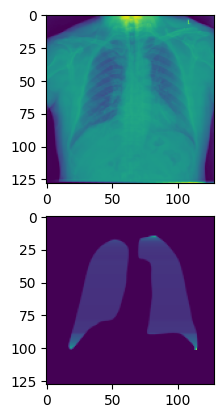

In [40]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(img_dataset[0])
ax[1].imshow(mask_dataset[0])
plt.show()

In [41]:
# split the data into train test with following specifications
#Hint: train_test_split(img_dataset,mask_dataset,test_size=0.20,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(img_dataset,mask_dataset,test_size=0.20,random_state=42)

In [42]:
#take the pre-trained model as resnet34 and do pre-processing
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [43]:
# use the preprocessed train input for model fitting
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)

In [44]:
#load the Unet model using the below syntax
model= sm.Unet(BACKBONE, input_shape=(128,128,1),
                                encoder_weights=None, classes=1, activation='sigmoid')
# Model compilation with the following specifications
#Hint: optimizer='Adam'
#    loss=sm.losses.bce_jaccard_loss
#    metrics=[sm.metrics.iou_score])

In [45]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 128, 128, 1)  3           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_68 (ZeroPadding2 (None, 134, 134, 1)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 64, 64, 64)   3136        zero_padding2d_68[0][0]          
____________________________________________________________________________________________

In [46]:
# fit the model for X_train_prepr and y_train.
# use batch_size=2 and epochs=5 (maximum)

In [47]:
model.compile(optimizer='Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

In [56]:
model.fit(X_train_prepr, y_train, batch_size=2, epochs=50, validation_data=(X_test_prepr, y_test))

Epoch 1/50
7/7 [==============================] - 7s 1s/step - loss: 1.1368 - iou_score: 0.0577 - val_loss: 1.5068 - val_iou_score: 9.1447e-09
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 1.1113 - iou_score: 0.0626 - val_loss: 1.5066 - val_iou_score: 9.1748e-09
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 1.0904 - iou_score: 0.0692 - val_loss: 1.5075 - val_iou_score: 8.9519e-09
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 1.0772 - iou_score: 0.0709 - val_loss: 1.5115 - val_iou_score: 4.3216e-07
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 1.0676 - iou_score: 0.0735 - val_loss: 1.3281 - val_iou_score: 0.0035
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 1.0606 - iou_score: 0.0774 - val_loss: 1.1323 - val_iou_score: 0.0304
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 1.0519 - iou_score: 0.0783 - val_loss: 1.1276 - val_iou_score: 0.0297
Epoch 8/50


In [57]:
output = model.predict(X_test_prepr)
output.shape

(4, 128, 128, 1)

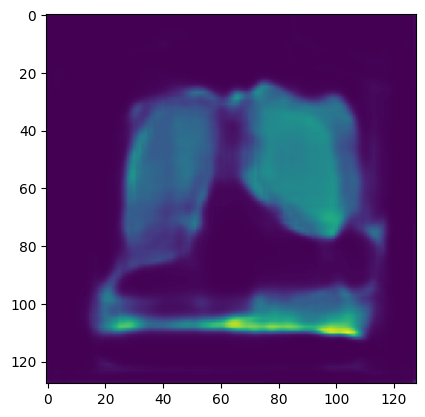

In [58]:
plt.imshow(output[1])

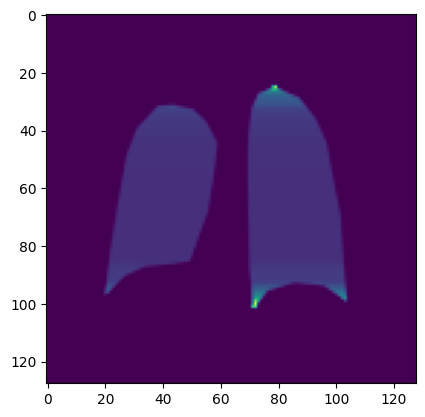

In [59]:
plt.imshow(y_test[1])